# Matplotlib
[reference](https://github.com/matplotlib/AnatomyOfMatplotlib)
## Introduction

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes: 

 1. allow for interactive, cross-platform control of figures and plots
 2. make it easy to produce static raster or vector graphics files without the need for any GUIs. 
 
Furthermore, mpl gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

## Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](https://matplotlib.org/gallery/index.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

As always, if you have a new and interesting plot that demonstrates a feature of Matplotlib, feel free to submit a concise, well-commented version of the code for inclusion in the gallery.

# Quick note on "backends" and Jupyter notebooks

Matplotlib has multiple "backends" that handle converting Matplotlib's in-memory representation of your plot into the colorful output you can look at.  This is done either by writing files (e.g., png, svg, pdf) that you can use an external tool to look at or by embedding into your GUI toolkit of choice (Qt, Tk, Wx, etc).

To check what backend Matplotlib is currently using:

In [1]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.0.2
module://ipykernel.pylab.backend_inline


In [3]:
matplotlib.use('nbagg')
print(matplotlib.get_backend())

nbAgg


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
fig = plt.figure(facecolor=(1, 0, 0, 0.1))   # red background to see where the figure is

<IPython.core.display.Javascript object>


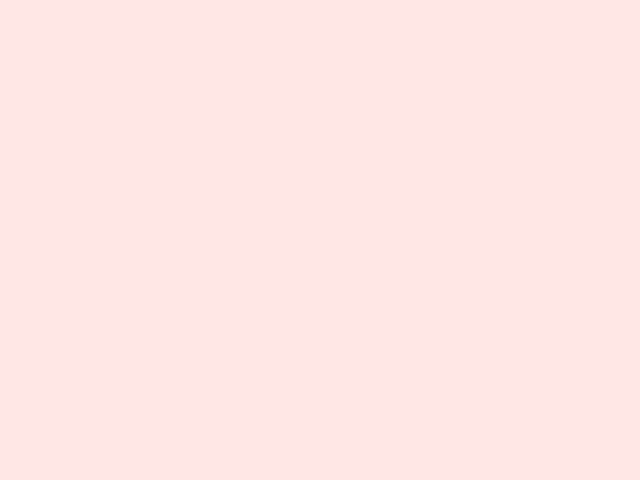

In [14]:
plt.show()

<IPython.core.display.Javascript object>


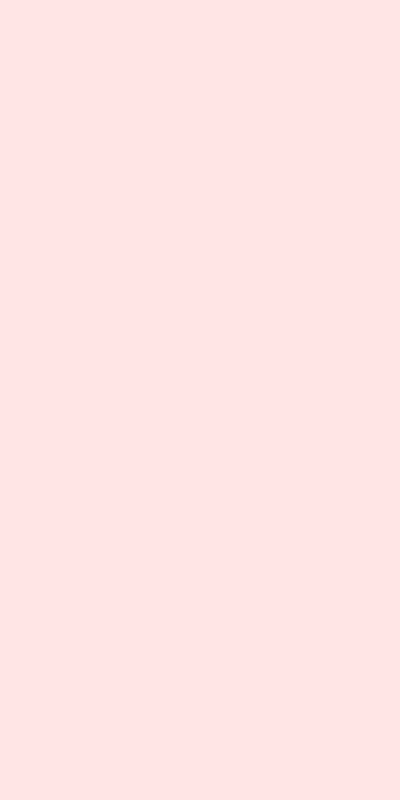

In [12]:
# Twice as tall as it is wide:
fig = plt.figure(figsize=plt.figaspect(2.0), facecolor=(1, 0, 0, .1))
plt.show()

# Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

<IPython.core.display.Javascript object>


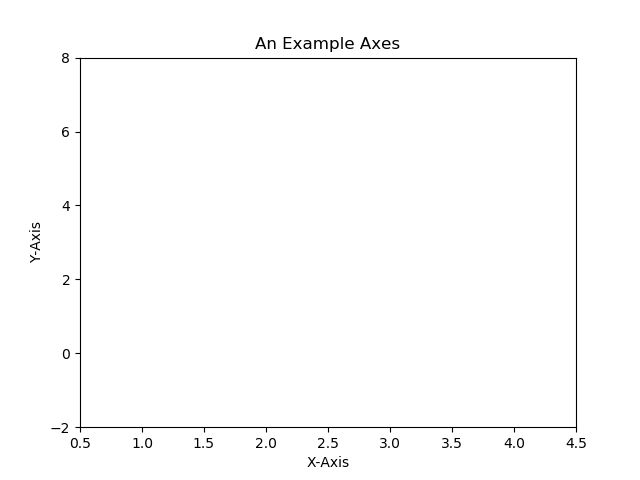

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()


Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

<IPython.core.display.Javascript object>


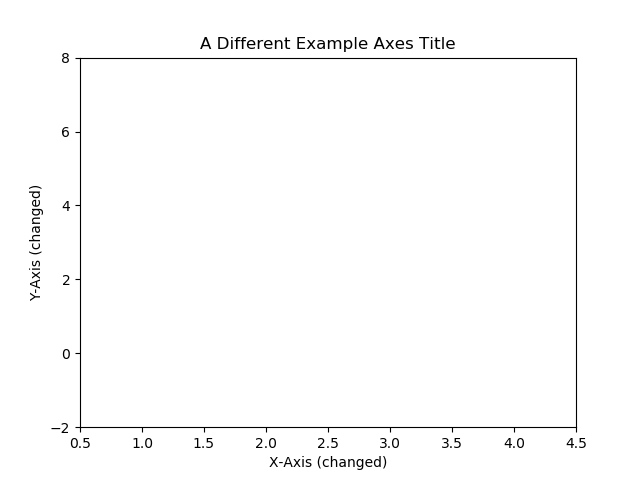

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')
plt.show()

<IPython.core.display.Javascript object>


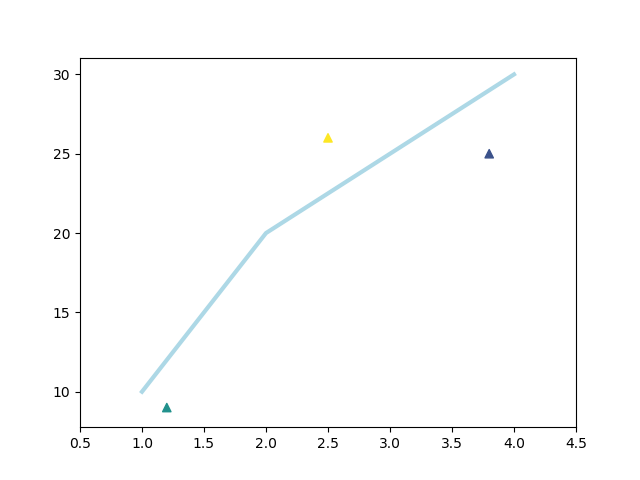

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

## Axes methods vs. pyplot

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

<IPython.core.display.Javascript object>


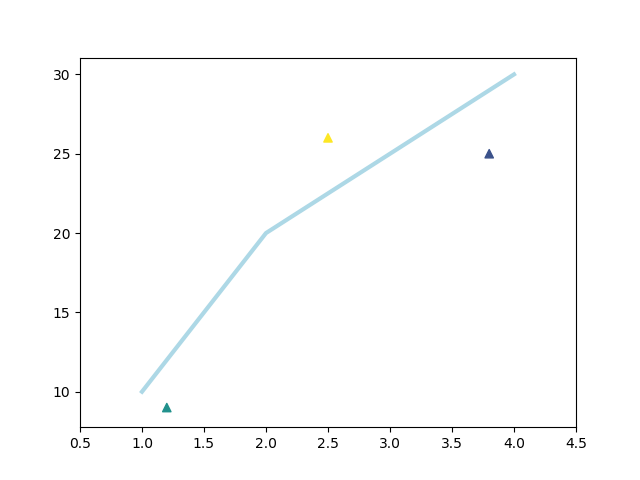

In [22]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.xlim(0.5, 4.5)
plt.show()

That is a bit terser and has fewer local varialbes, so, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

<IPython.core.display.Javascript object>


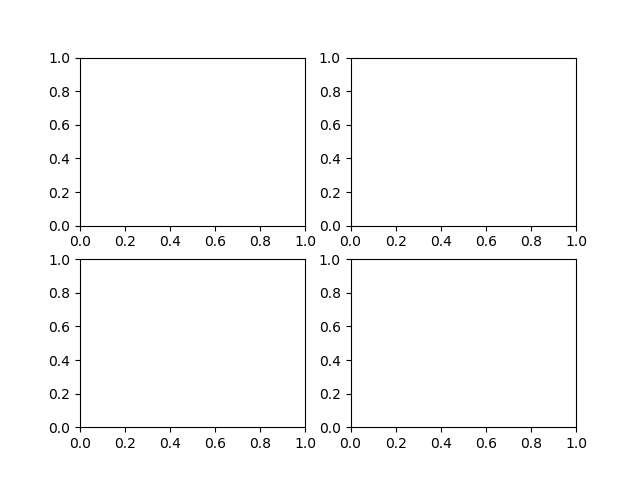

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

<IPython.core.display.Javascript object>


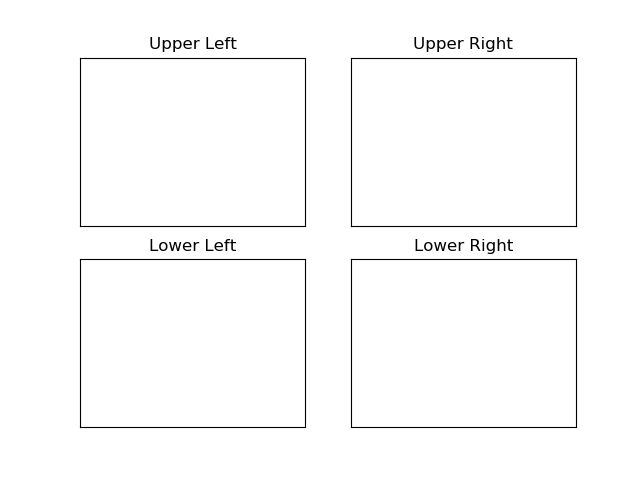

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

/home/gf/packages/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


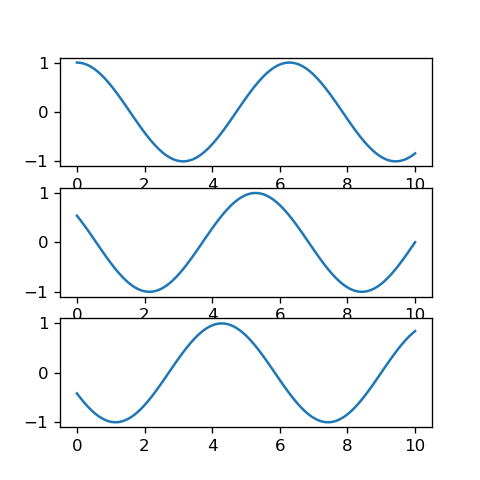

In [30]:
# %load exercises/1.1-subplots_and_basic_plotting.py
import numpy as np
import matplotlib.pyplot as plt

# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(4,4))
axes[0].plot(x,y1)
axes[1].plot(x,y2)
axes[2].plot(x,y3)
plt.show()

In [31]:
# Let's get our standard imports out of the way
from __future__ import print_function
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


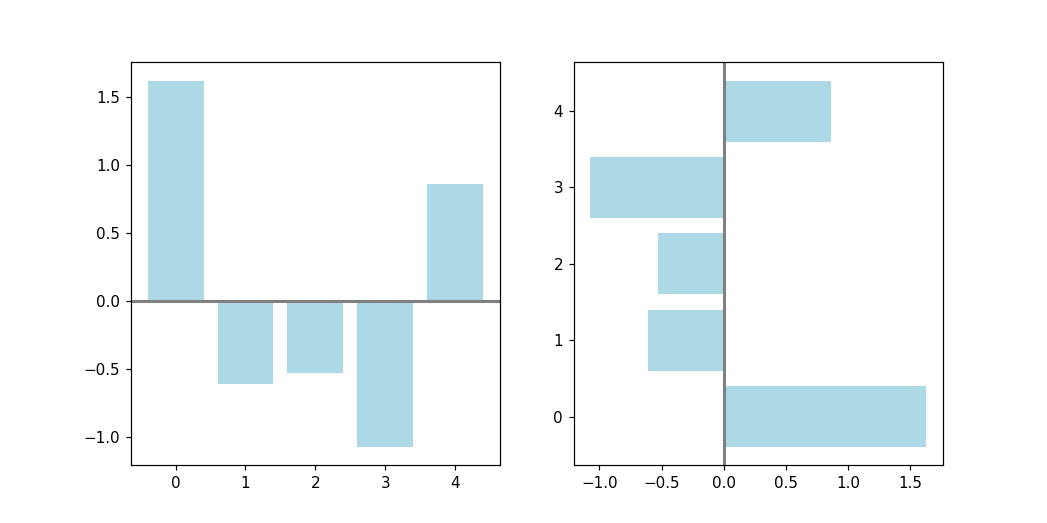

In [33]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

<IPython.core.display.Javascript object>


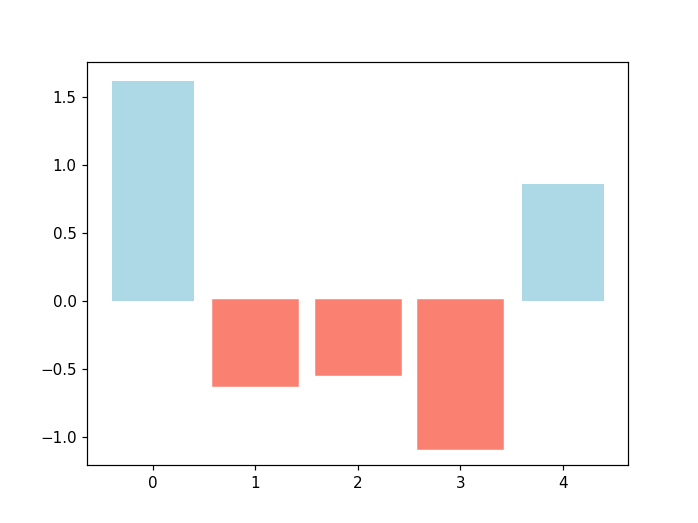

In [35]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y, color='lightblue', align='center')

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(edgecolor='darkred', color='salmon', linewidth=3)

plt.show()

<IPython.core.display.Javascript object>


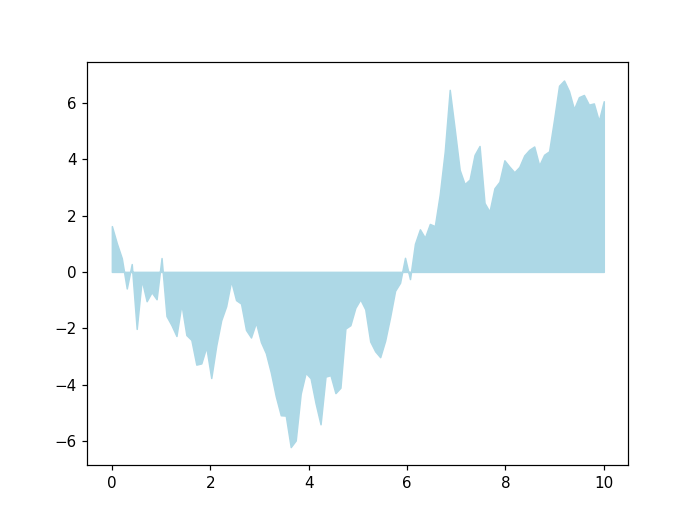

In [36]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
plt.show()

<IPython.core.display.Javascript object>


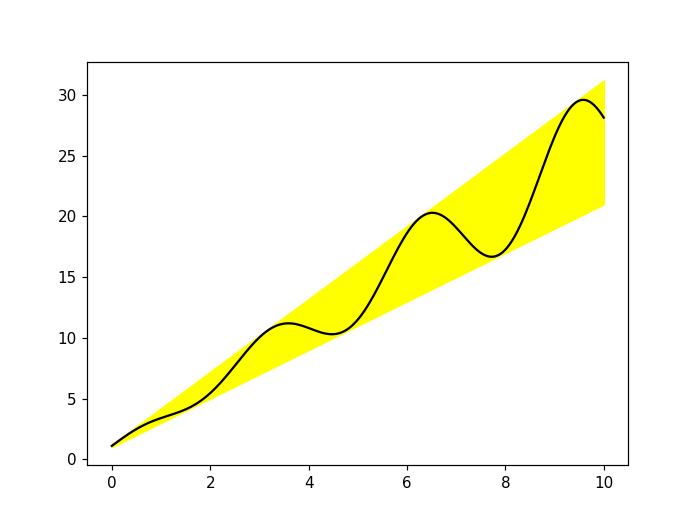

In [37]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, color='yellow')

# Plot the "centerline" with `plot`
ax.plot(x, y_mean, color='black')

plt.show()

<IPython.core.display.Javascript object>


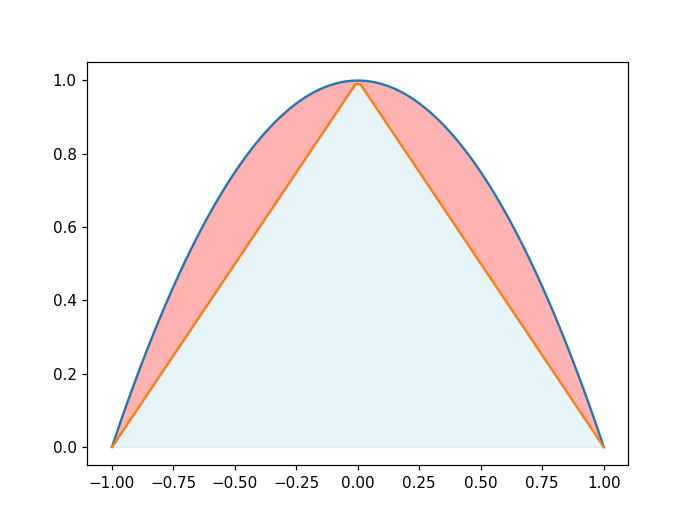

In [45]:
def f1(x):
    return 1-x**2

def f2(x):
    return 1-np.abs(x)


x = np.linspace(-1, 1, 100)

fig, ax = plt.subplots()

y1 = f1(x)
y2 = f2(x)

ax.plot(x,y1)
ax.plot(x,y2)


ax.fill_between(x, y1-y1, y2, color='lightblue',alpha=0.3)

ax.fill_between(x, y2, y1, color='red',alpha=0.3)
plt.show()

In [46]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

# Now you're on your own!


<IPython.core.display.Javascript object>


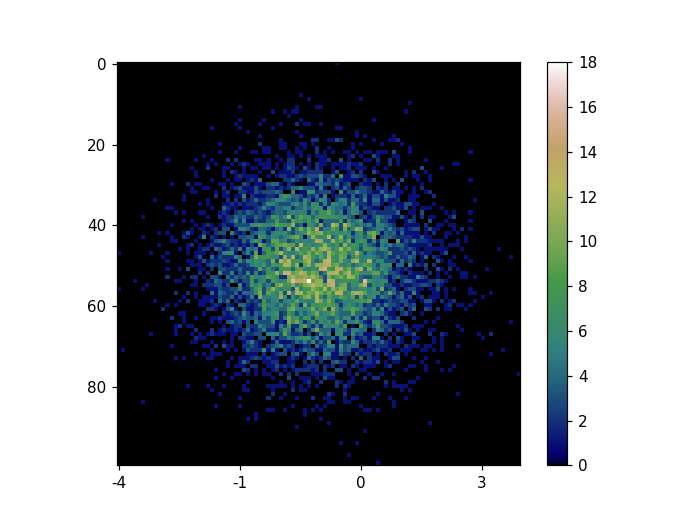

In [53]:
from matplotlib.cbook import get_sample_data
data = np.random.normal(0,1,(10000,2))

data,binx,biny = np.histogram2d(data[:,0],data[:,1],bins=100)

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='gist_earth')

plt.xticks(np.arange(0,100,30),binx[::30].astype(np.int))

fig.colorbar(im)
plt.show()

<IPython.core.display.Javascript object>


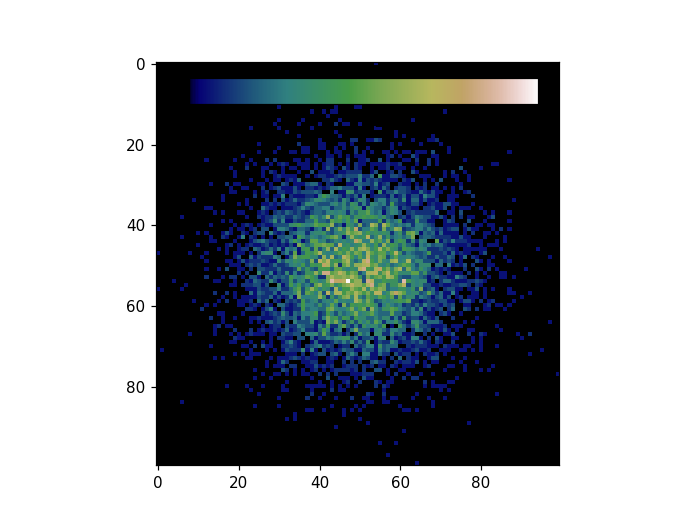

In [54]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(data, cmap='gist_earth')
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

<IPython.core.display.Javascript object>


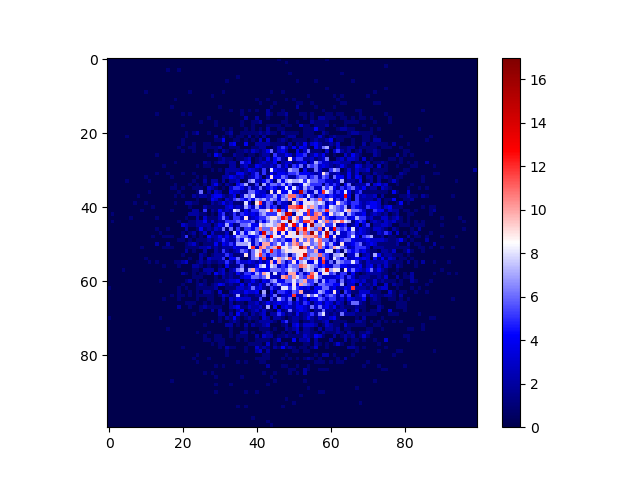

In [38]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic')
fig.colorbar(im)
plt.show()

<IPython.core.display.Javascript object>


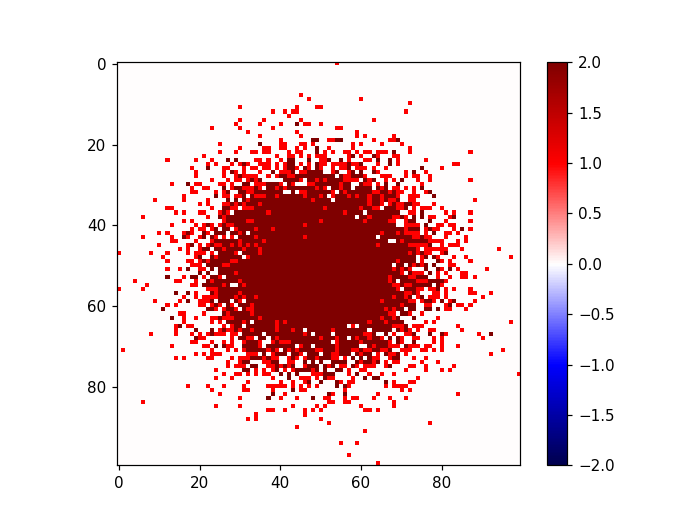

In [55]:
fig, ax = plt.subplots()
im = ax.imshow(data, 
               cmap='seismic',
               vmin=-2, vmax=2)
fig.colorbar(im)
plt.show()

<IPython.core.display.Javascript object>


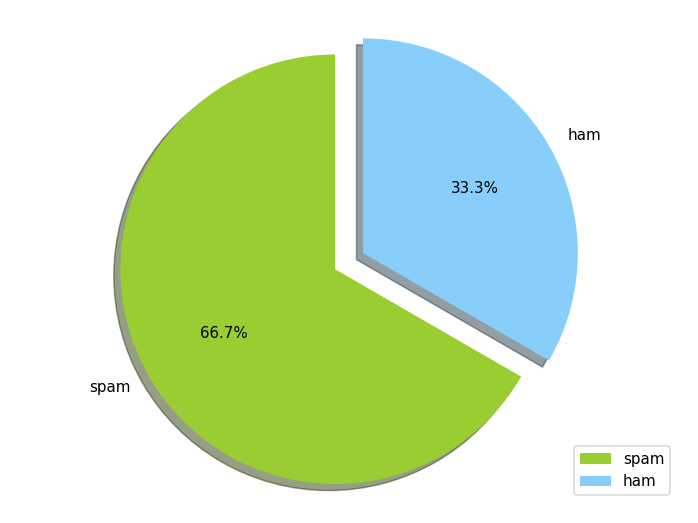

In [56]:
from matplotlib import pyplot as plt
import numpy as np

plt.pie(
    (10,5),
    labels=('spam','ham'),
    shadow=True,
    colors=('yellowgreen', 'lightskyblue'),
    explode=(0,0.15), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentage
    )
plt.legend(fancybox=True)
plt.axis('equal')     # plot pyplot as circle
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


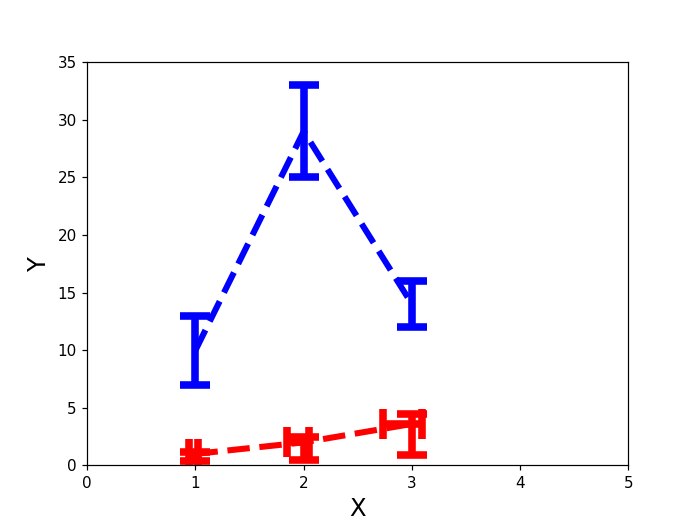

In [73]:
xaxis = [1, 2, 3]
mean1 = [1,2,3.6]
se1 = [0.2, 0.5, 0.9]
mean2 = [10, 29, 14]
se2 = [3, 4, 2]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('X', fontsize = 16)
ax.set_ylabel('Y', fontsize = 16)

ax.axis([0, 5, 0, 35])

eee = np.array([se1]*2)
eee[0,:] = 3*eee[0,:]

linestyle = {"linestyle":"--", "linewidth":4, "markeredgewidth":5, "elinewidth":5, "capsize":10}
ax.errorbar(xaxis, mean1, yerr = eee, xerr = 0.1*eee, color="r", **linestyle)
ax.errorbar(xaxis, mean2, yerr = se2, color="b", **linestyle)
plt.show()

/home/gf/packages/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


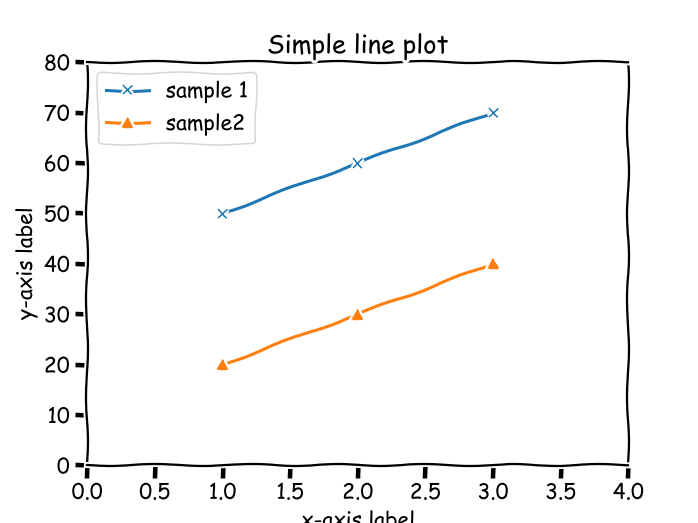

In [74]:
import matplotlib.pyplot as plt

x = [1, 2, 3]

y_1 = [50, 60, 70]
y_2 = [20, 30, 40]

with plt.xkcd():

    plt.plot(x, y_1, marker='x')
    plt.plot(x, y_2, marker='^')

    plt.xlim([0, len(x)+1])
    plt.ylim([0, max(y_1+y_2) + 10])
    plt.xlabel('x-axis label')
    plt.ylabel('y-axis label')
    plt.title('Simple line plot')
    plt.legend(['sample 1', 'sample2'], loc='upper left')

    plt.show()

/home/gf/packages/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead
  """
/home/gf/packages/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


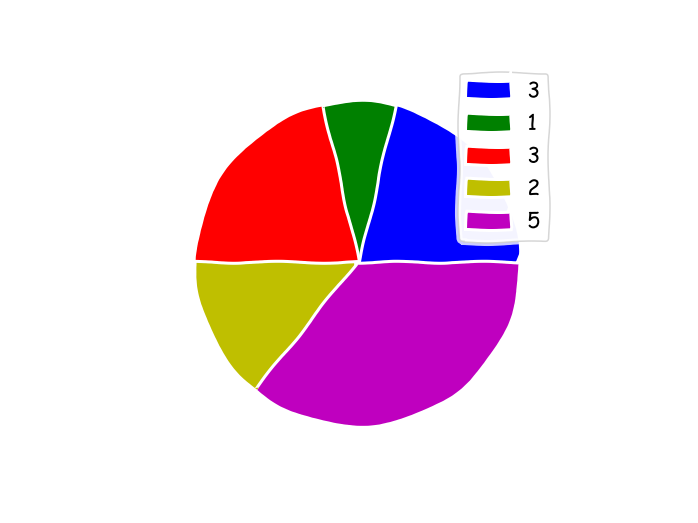

In [75]:
from matplotlib import pyplot as plt
import numpy as np

with plt.xkcd():
    X = np.random.random_integers(1,5,5) # 5 random integers within 1-5
    cols = ['b', 'g', 'r', 'y', 'm']
    plt.pie(X, colors=cols)
    plt.legend(X)

    plt.show()

# How to speak "MPL"
In the previous parts, you learned how Matplotlib organizes plot-making by figures and axes. We broke down the components of a basic figure and learned how to create them. You also learned how to add one or more axes to a figure, and how to tie them together. You even learned how to change some of the basic appearances of the axes. Finally, we went over some of the many plotting methods that Matplotlib has to draw on those axes. With all that knowledge, you should be off making great and wonderful figures.

Why are you still here?

"We don't know how to control our plots and figures!" says some random voice in the back of the room.

Of course! While the previous sections may have taught you some of the structure and syntax of Matplotlib, it did not describe much of the substance and vocabulary of the library. This section will go over many of the properties that are used throughout the library. Note that while many of the examples in this section may show one way of setting a particular property, that property may be applicible elsewhere in completely different context. This is the "language" of Matplotlib.

# Colors
This is, perhaps, the most important piece of vocabulary in Matplotlib. Given that Matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse". See the [full list](https://www.w3schools.com/Colors/colors_names.asp) of the 140 color names. 

Matplotlib supports the [xkcd color names](https://xkcd.com/color/rgb/) prefxed by `'xkcd:'`.

Matplotlib also understands  `{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}` which are the Tableau Colors from the ‘T10’ categorical palette (and the default color cycle);

### Hex values
Colors can also be specified by supplying a HTML/CSS hex string, such as `'#0000FF'` for blue. Support for an optional alpha channel was added for v2.0.

### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a light shade of gray.

### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)`, whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`.  The documentation will usually specify whether it accepts RGB or RGBA tuples. Sometimes, a list of tuples would be required for multiple colors, and you can even supply a Nx3 or Nx4 numpy array in such cases.

In functions such as `plot()` and `scatter()`, while it may appear that they can take a color specification, what they really need is a "format specification", which includes color as part of the format. Unfortunately, such specifications are string only and so RGB[A] tuples are not supported for such arguments (but you can still pass an RGB[A] tuple for a "color" argument).

Oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this inconsistency.



<IPython.core.display.Javascript object>


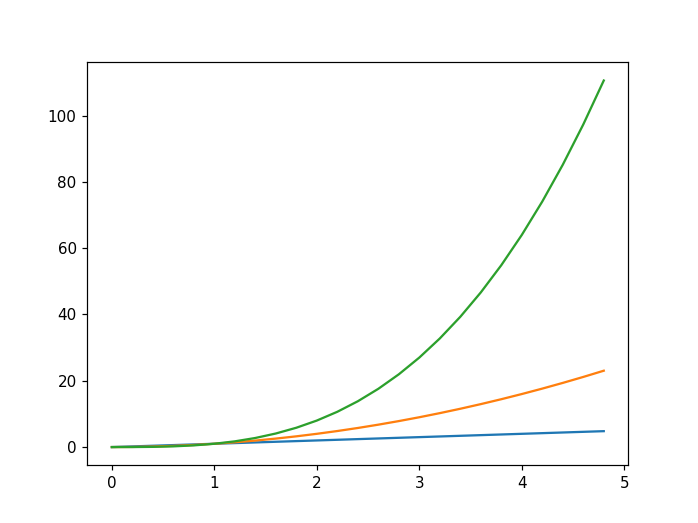

In [76]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, t, t**2, t, t**3)
plt.show()

# Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

<IPython.core.display.Javascript object>


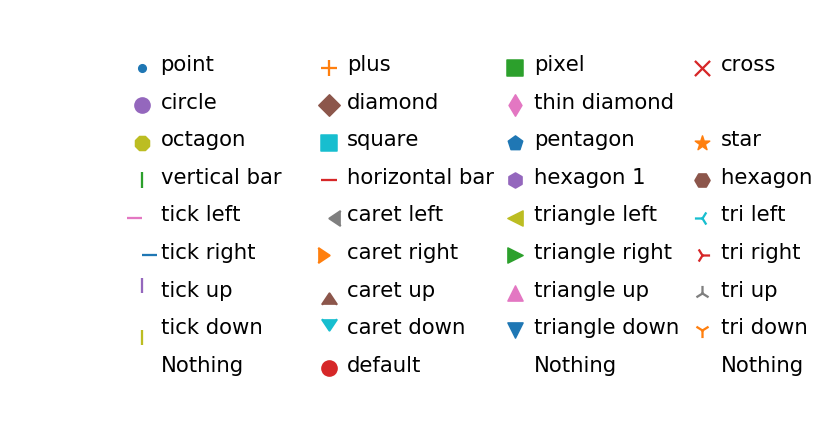

In [77]:
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "default", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()
plt.show()

# Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

<IPython.core.display.Javascript object>


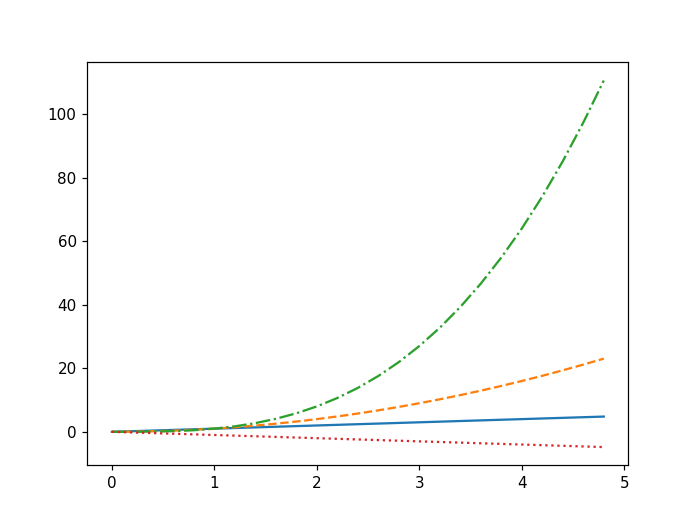

In [78]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, '-', t, t**2, '--', t, t**3, '-.', t, -t, ':')
plt.show()

<IPython.core.display.Javascript object>


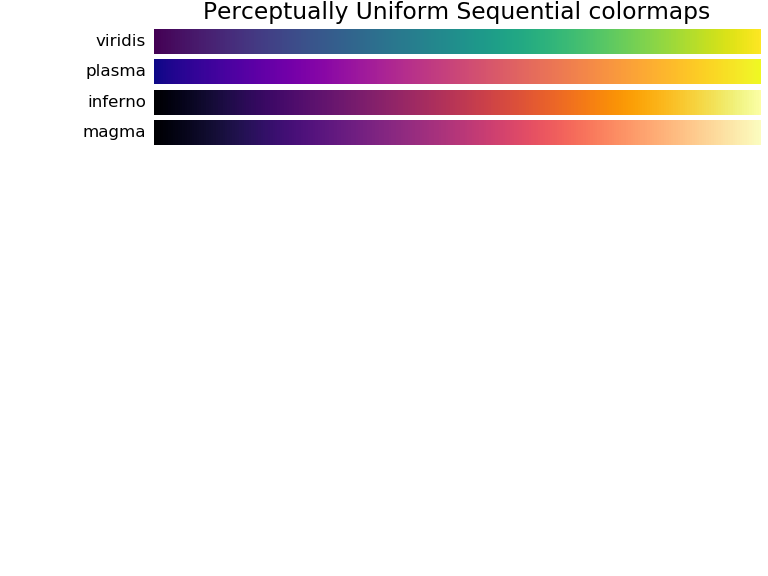

<IPython.core.display.Javascript object>


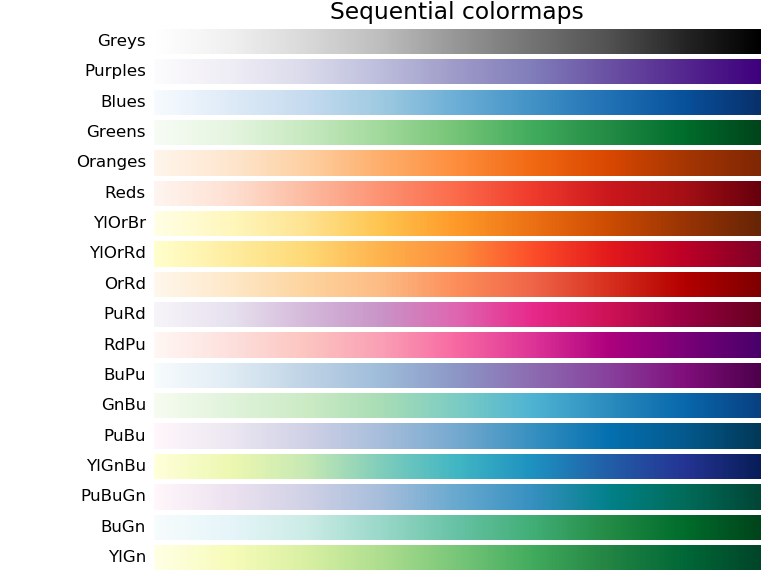

<IPython.core.display.Javascript object>


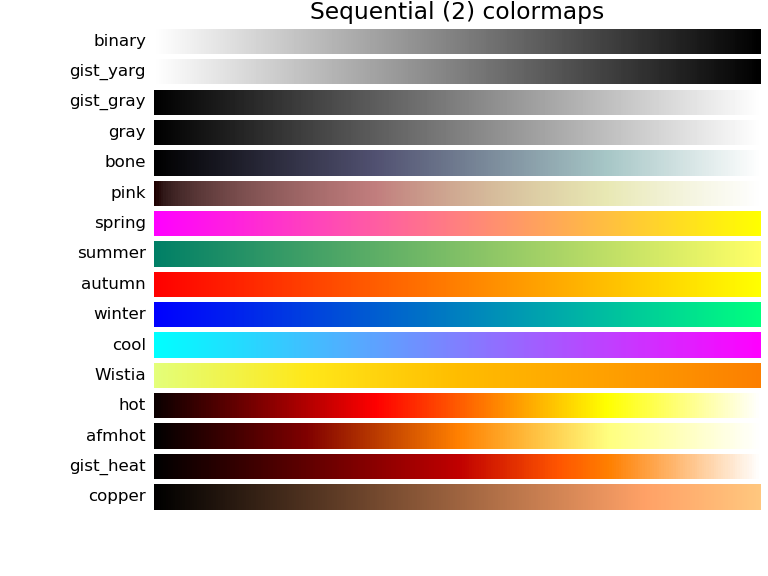

<IPython.core.display.Javascript object>


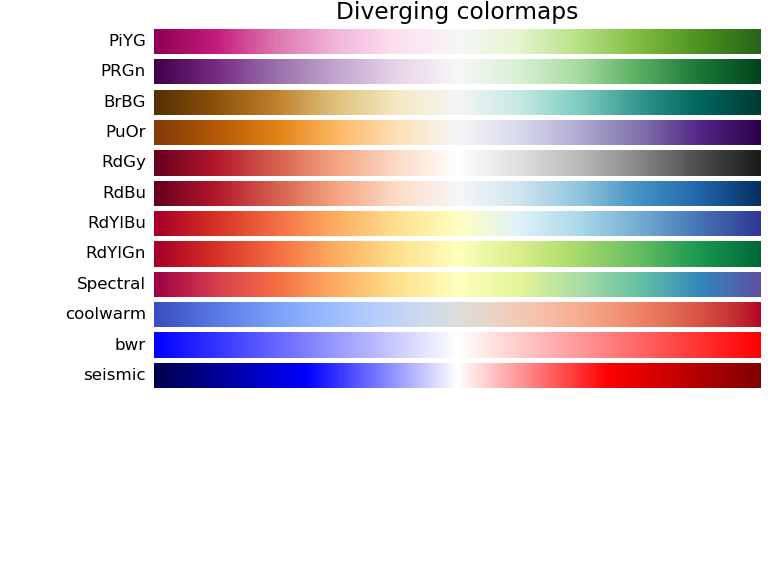

<IPython.core.display.Javascript object>


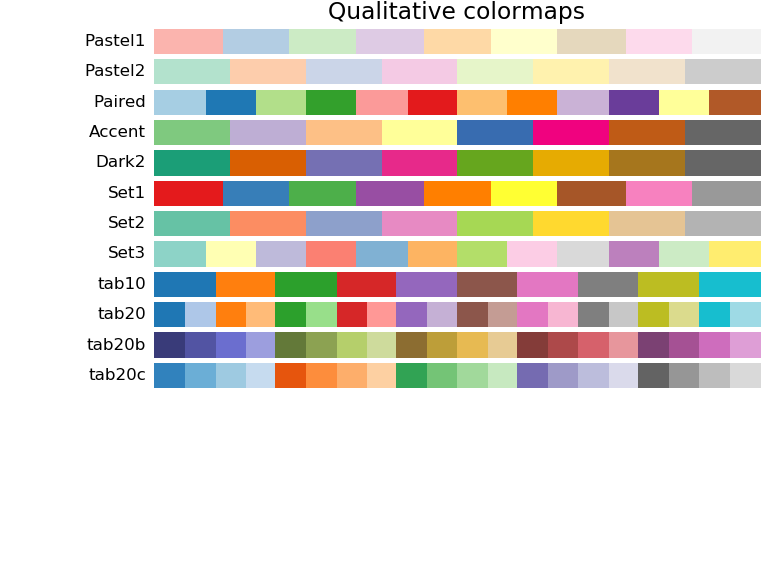

<IPython.core.display.Javascript object>


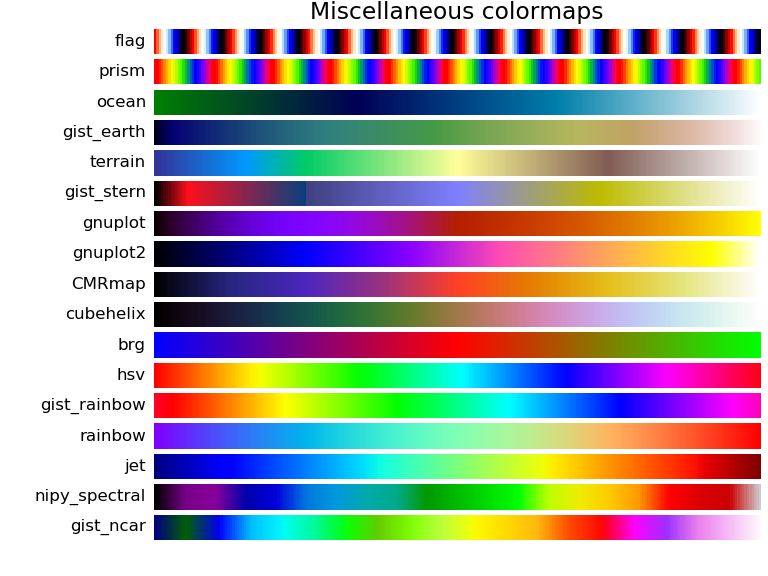

In [79]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()


<IPython.core.display.Javascript object>


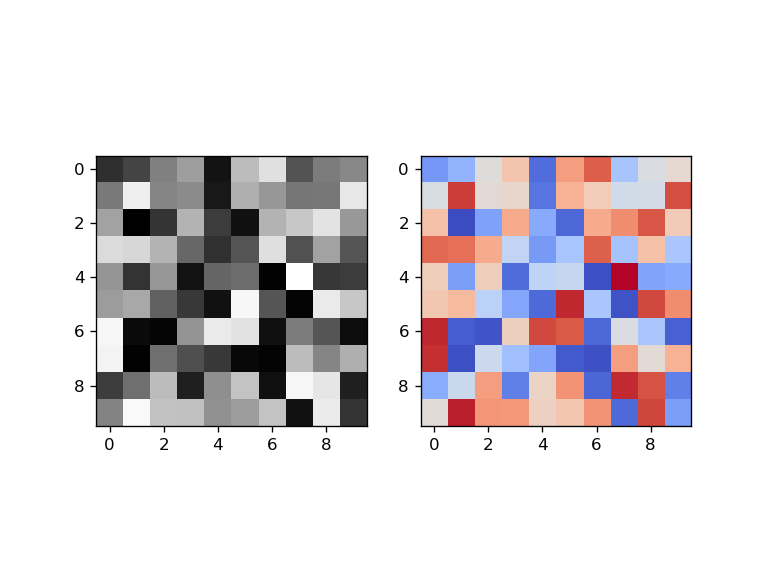

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2)
z = np.random.random((10, 10))
ax1.imshow(z, interpolation='none', cmap='gray')
ax2.imshow(z, interpolation='none', cmap='coolwarm')
plt.show()

<IPython.core.display.Javascript object>


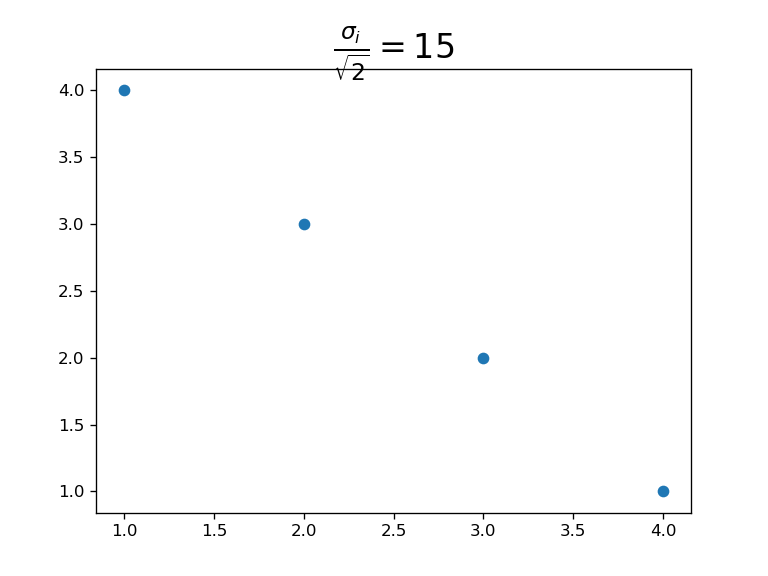

In [82]:
plt.scatter([1, 2, 3, 4], [4, 3, 2, 1])
plt.title(r'$\frac{\sigma_i}{\sqrt{2}}=15$', fontsize=20)
plt.show()

# Hatches
A Patch object can have a hatching defined for it.

* /   - diagonal hatching
* \   - back diagonal
* |   - vertical
* \-   - horizontal
* \+   - crossed
* x   - crossed diagonal
* o   - small circle
* O   - large circle (upper-case 'o')
* .   - dots
* \*   - stars
     
Letters can be combined, in which case all the specified
hatchings are done.  Repeating a character increases the
density of hatching of that pattern.

/home/gf/packages/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


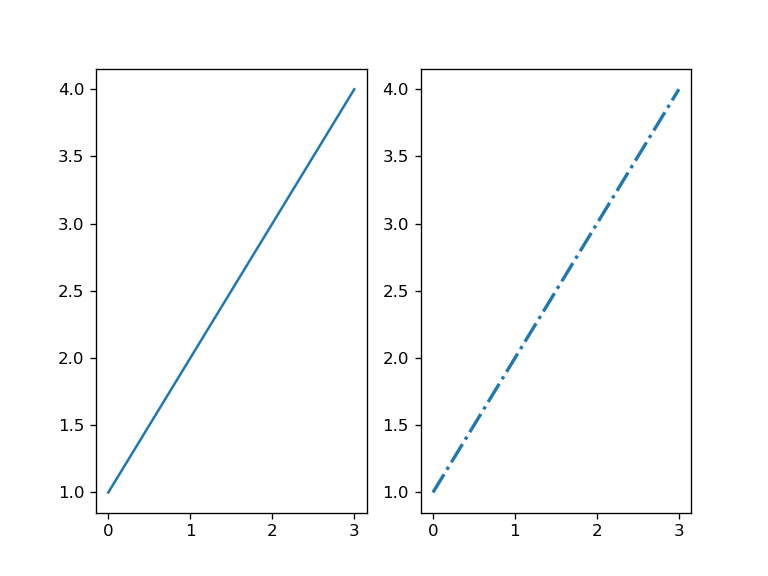

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcdefaults()  # for when re-running this cell

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([1, 2, 3, 4])

mpl.rc('lines', linewidth=2, linestyle='-.')
# Equivalent older, but still valid syntax
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.linestyle'] = '-.'
ax2.plot([1, 2, 3, 4])
plt.show()

In [1]:
from __future__ import print_function

# Import conventions we'll be using here. See Part 1
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


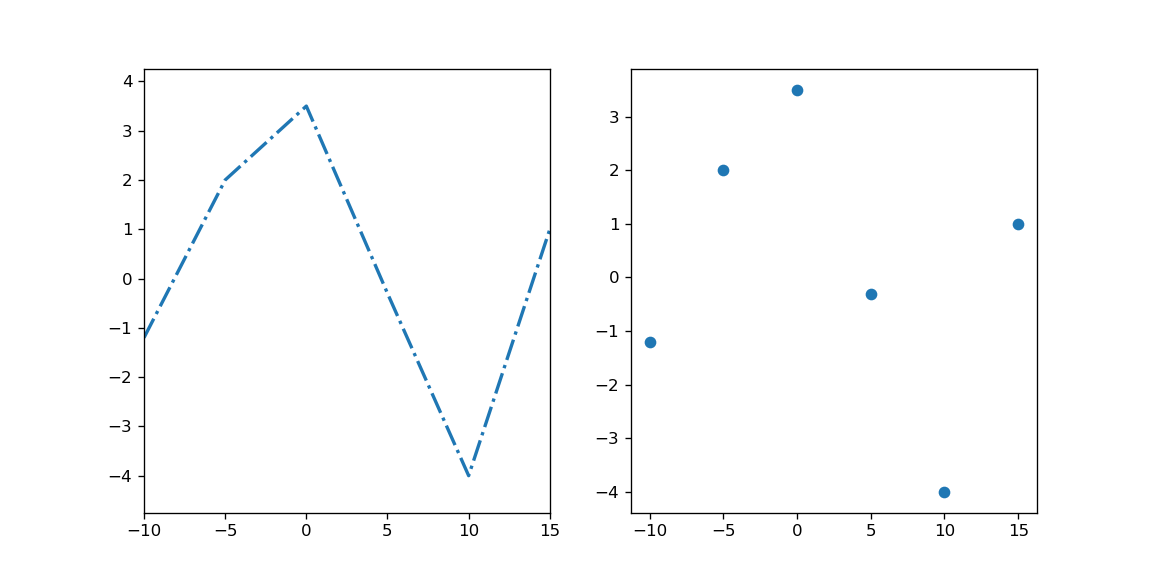

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

ax1.margins(x=0.0, y=0.1) # 10% padding in the y-direction only
ax2.margins(0.05) # 5% padding in all directions

plt.show()

<IPython.core.display.Javascript object>


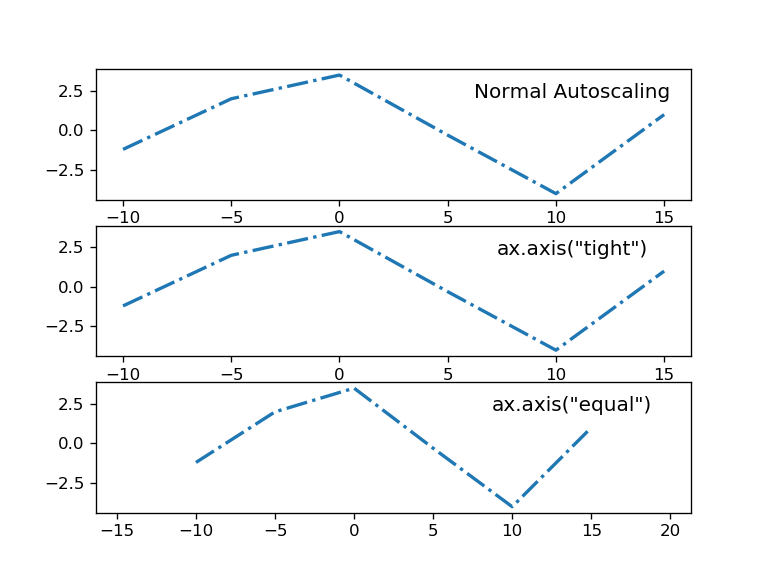

In [86]:
fig, axes = plt.subplots(nrows=3)

for ax in axes:
    ax.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

axes[0].set_title('Normal Autoscaling', y=0.7, x=0.8)

axes[1].set_title('ax.axis("tight")', y=0.7, x=0.8)
axes[1].axis('tight')

axes[2].set_title('ax.axis("equal")', y=0.7, x=0.8)
axes[2].axis('equal')

plt.show()

In [87]:
axes[1].axis()

(-11.25, 16.25, -4.375, 3.875)

<IPython.core.display.Javascript object>


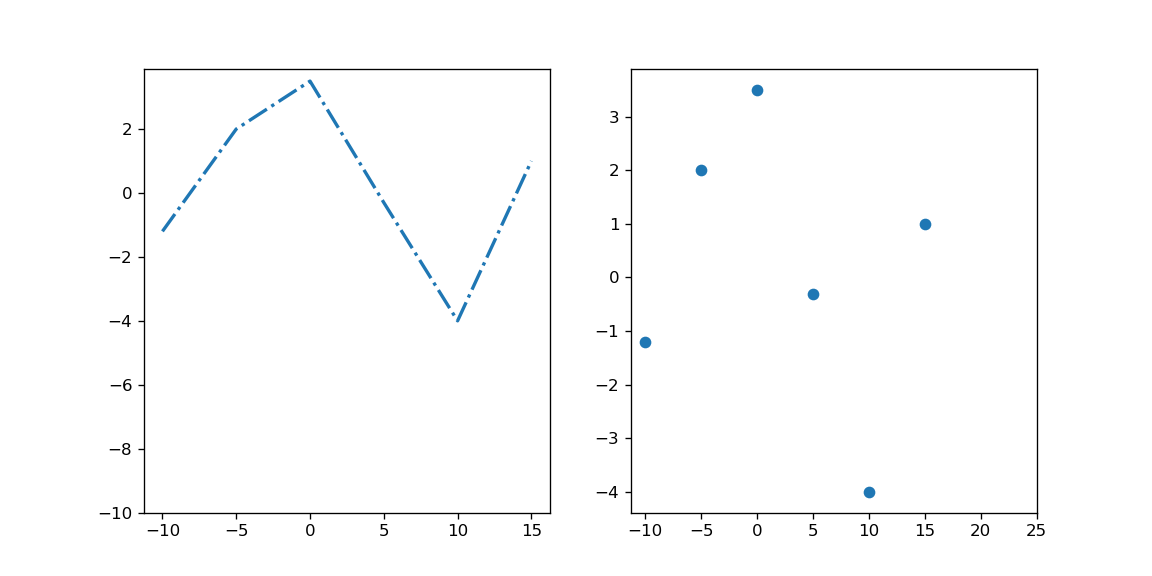

In [88]:
# Good -- setting limits after plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
plt.show()

<IPython.core.display.Javascript object>


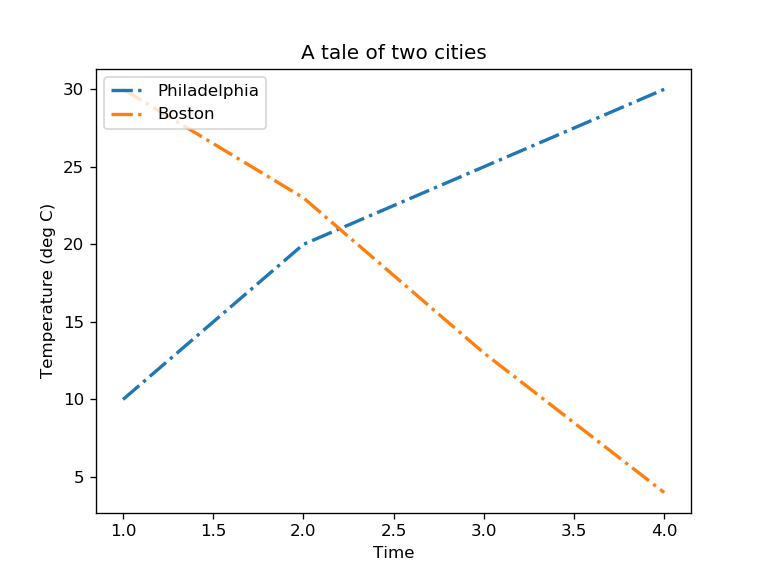

In [89]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend(loc=2)
plt.show()

<IPython.core.display.Javascript object>


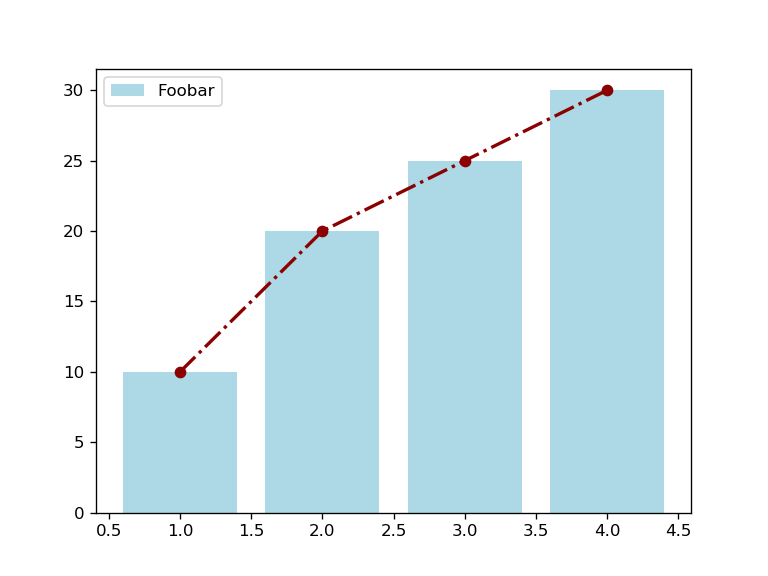

In [90]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 25, 30], label="Foobar", align='center', color='lightblue')
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label="_nolegend_", marker='o', color='darkred')
ax.legend(loc='best')
plt.show()

# Dealing with the boundaries: Layout, ticks, spines, etc

<IPython.core.display.Javascript object>


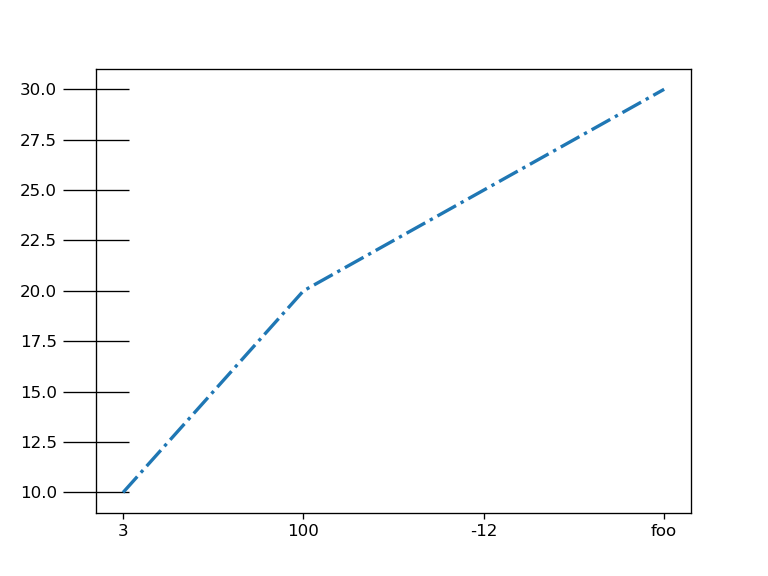

In [91]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', direction='inout', length=40)

plt.show()

In [94]:
x = [1,2,3]
y = ['a','b','c']

for i,j in zip(x,y):
    print(i,j)

1 a
2 b
3 c


<IPython.core.display.Javascript object>


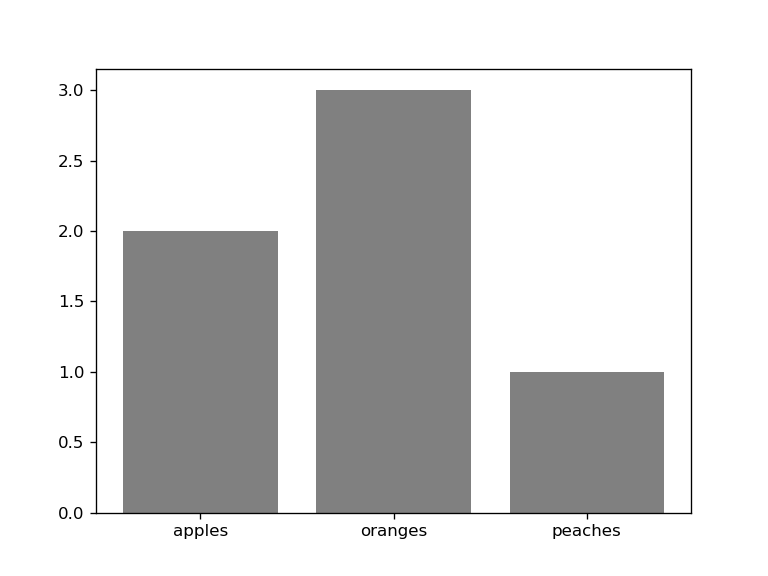

In [95]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, ax = plt.subplots()
ax.bar(fruit, value, align='center', color='gray')
plt.show()

<IPython.core.display.Javascript object>


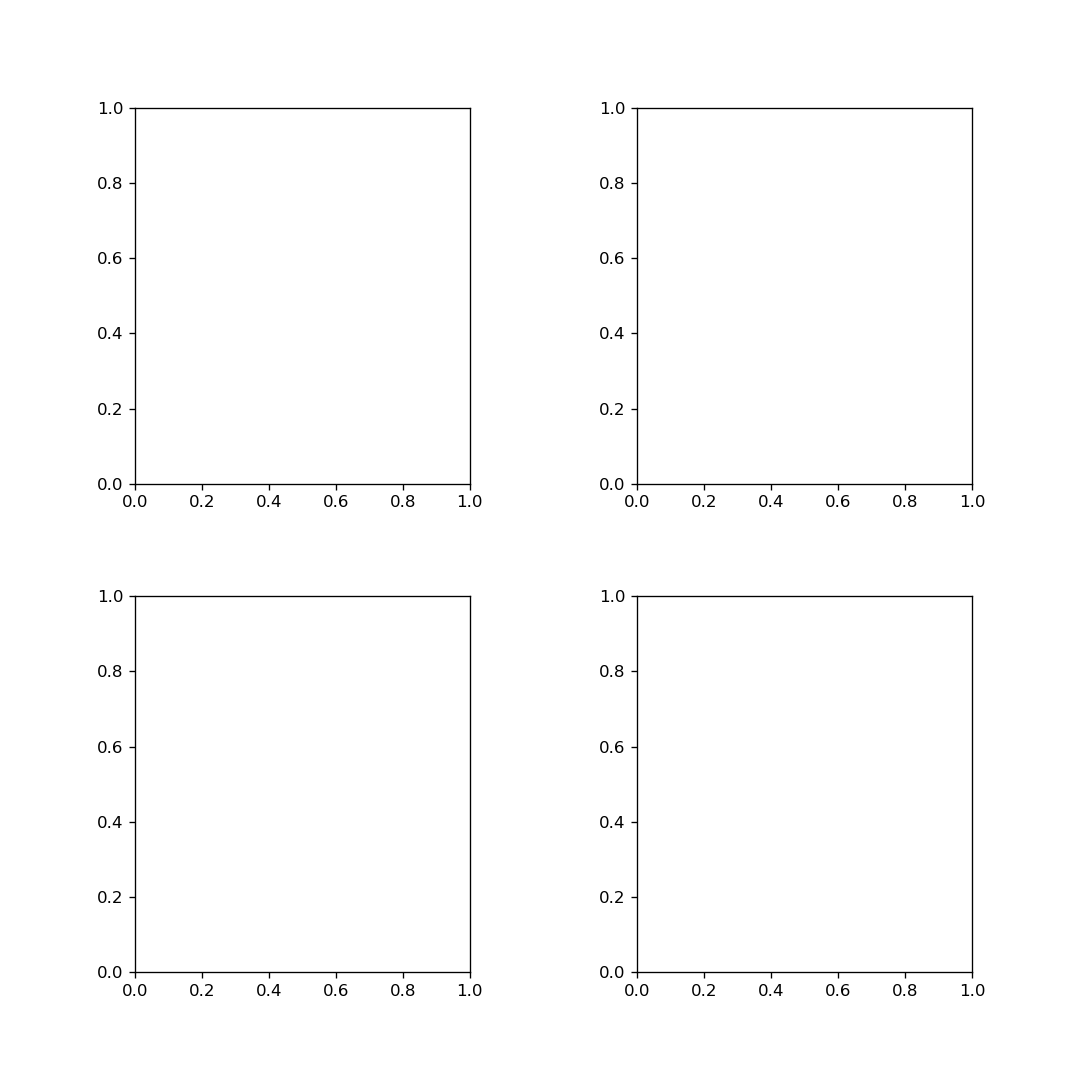

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)
plt.show()

<IPython.core.display.Javascript object>


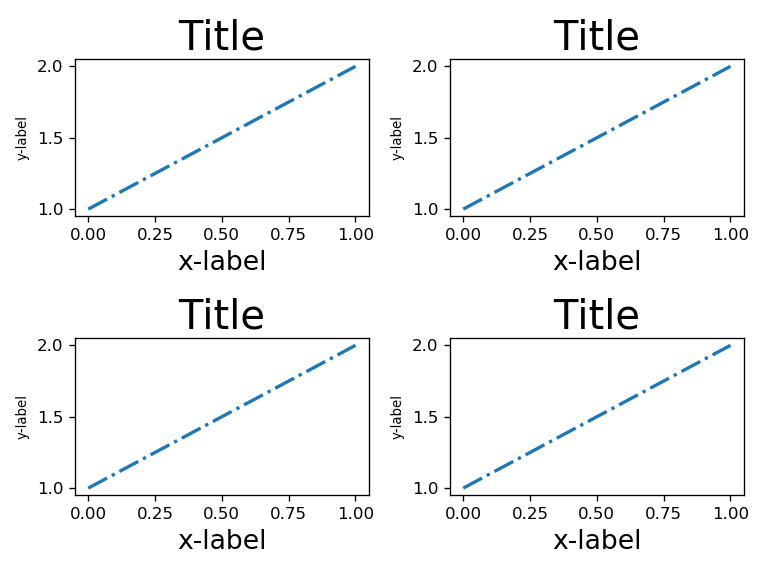

In [98]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Enable fig.tight_layout to compare...
fig.tight_layout()
# fig.subplots_adjust(wspace=0.5, hspace=0.3,
#                     left=0.125, right=0.9,
#                     top=0.9,    bottom=0.1)

plt.show()

<IPython.core.display.Javascript object>


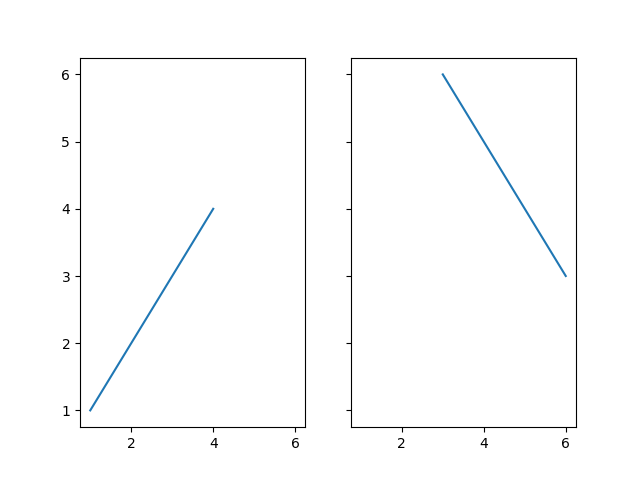

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2.plot([3, 4, 5, 6], [6, 5, 4, 3])
plt.show()

<IPython.core.display.Javascript object>


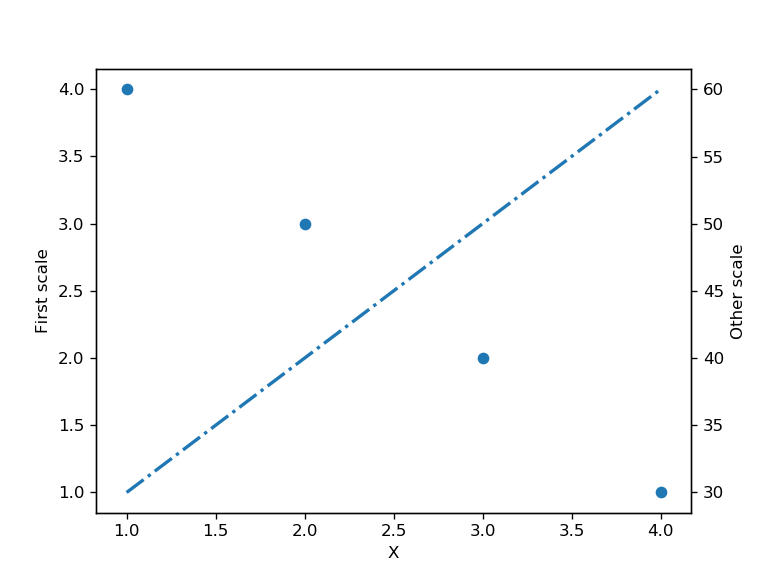

In [102]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2 = ax1.twinx()
ax2.scatter([1, 2, 3, 4], [60, 50, 40, 30])
ax1.set(xlabel='X', ylabel='First scale')
ax2.set(ylabel='Other scale')
plt.show()

<IPython.core.display.Javascript object>


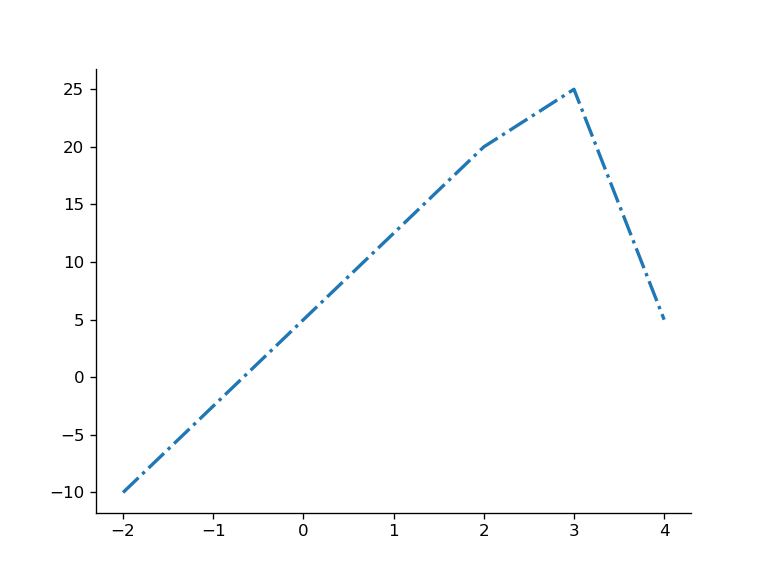

In [103]:
fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')  # no ticklines at the top
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')  # no ticklines on the right

# "outward"
# Move the two remaining spines "out" away from the plot by 10 points
#ax.spines['bottom'].set_position(('outward', 10))
#ax.spines['left'].set_position(('outward', 10))

# "data"
# Have the spines stay intersected at (0,0)
#ax.spines['bottom'].set_position(('data', 0))
#ax.spines['left'].set_position(('data', 0))

# "axes"
# Have the two remaining spines placed at a fraction of the axes
#ax.spines['bottom'].set_position(('axes', 0.75))
#ax.spines['left'].set_position(('axes', 0.3))

plt.show()

<IPython.core.display.Javascript object>


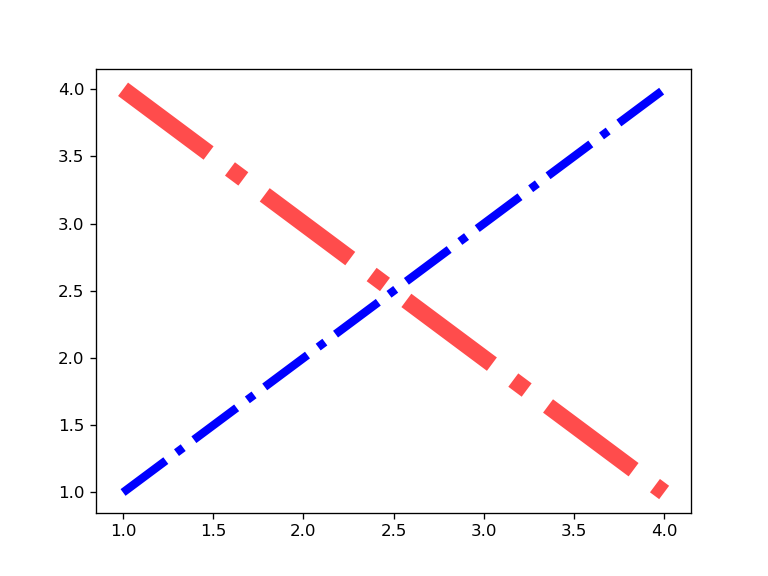

In [104]:
fig, ax = plt.subplots(1, 1)
lines = plt.plot([1, 2, 3, 4], [1, 2, 3, 4], 'b', [1, 2, 3, 4], [4, 3, 2, 1], 'r')
lines[0].set(linewidth=5)
lines[1].set(linewidth=10, alpha=0.7)
plt.show()

<IPython.core.display.Javascript object>


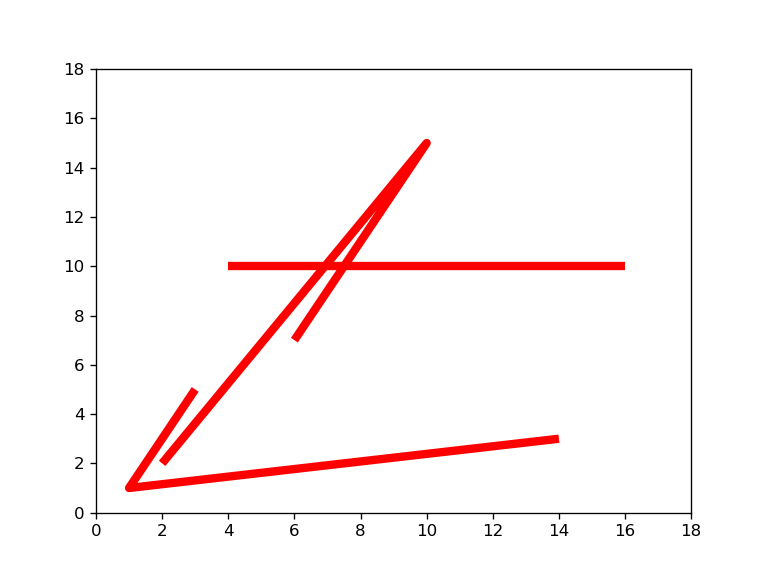

In [105]:
from matplotlib.collections import LineCollection
fig, ax = plt.subplots(1, 1)
# A collection of 3 lines
lc = LineCollection([[(4, 10), (16, 10)],
                     [(2, 2), (10, 15), (6, 7)],
                     [(14, 3), (1, 1), (3, 5)]])
lc.set_color('r')
lc.set_linewidth(5)
ax.add_collection(lc)
ax.set_xlim(0, 18)
ax.set_ylim(0, 18)
plt.show()

<IPython.core.display.Javascript object>


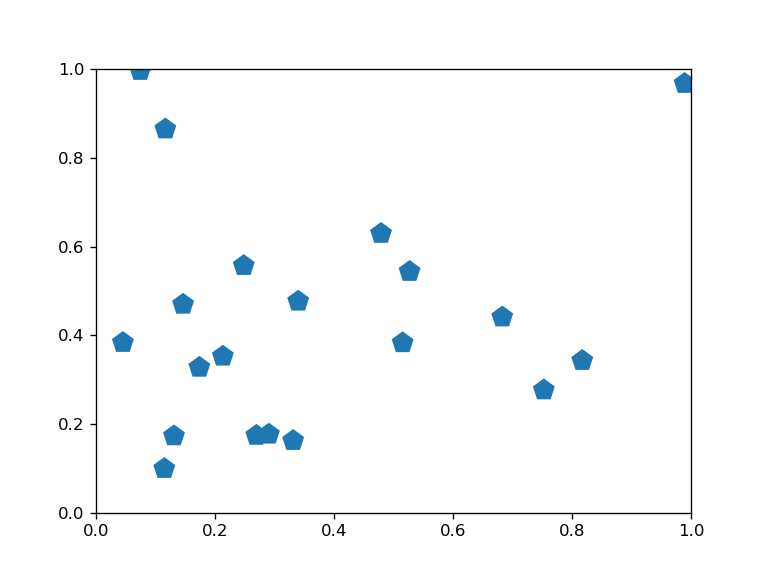

In [106]:
from matplotlib.collections import RegularPolyCollection

fig, ax = plt.subplots(1, 1)
offsets = np.random.rand(20, 2)
collection = RegularPolyCollection(
    numsides=5,  # a pentagon
    sizes=(150,),
    offsets=offsets,
    transOffset=ax.transData,
    )
ax.add_collection(collection)
plt.show()

<IPython.core.display.Javascript object>


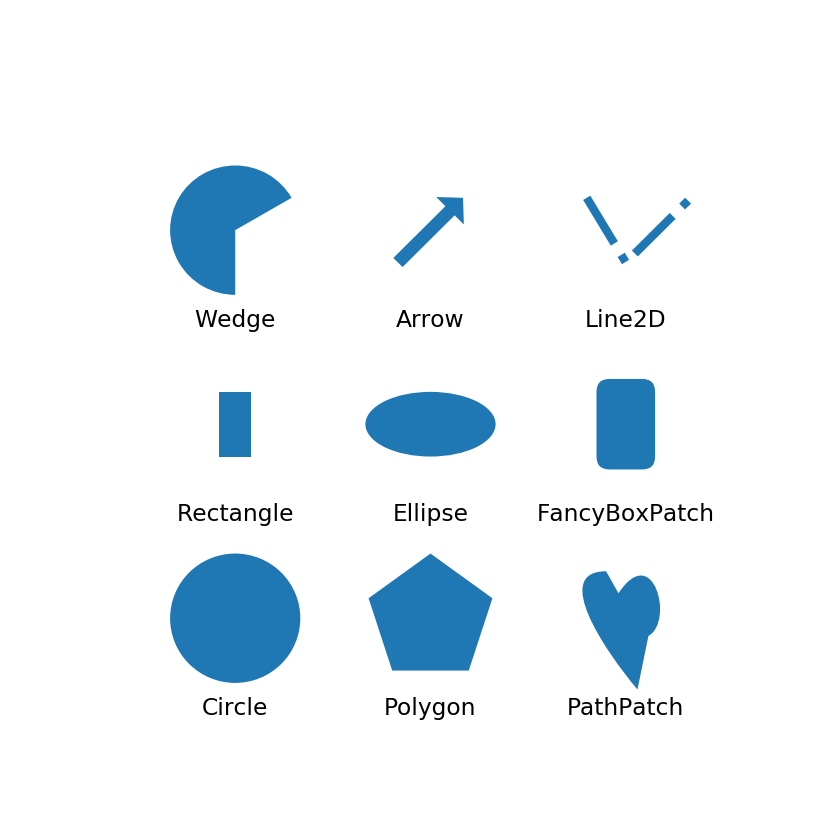

In [107]:
"""
Show examples of matplotlib artists
http://matplotlib.org/api/artist_api.html

Several examples of standard matplotlib graphics primitives (artists)
are drawn using matplotlib API. Full list of artists and the
documentation is available at
http://matplotlib.org/api/artist_api.html

Copyright (c) 2010, Bartosz Telenczuk

License: This work is licensed under the BSD. A copy should be
included with this source code, and is also available at
http://www.opensource.org/licenses/bsd-license.php
"""

from matplotlib.collections import PatchCollection
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

fig, ax = plt.subplots(1, 1, figsize=(7,7))

# create 3x3 grid to plot the artists
pos = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1)
patches = []

# add a circle
art = mpatches.Circle(pos[:, 0], 0.1, ec="none")
patches.append(art)
plt.text(pos[0, 0], pos[1, 0] - 0.15, "Circle", ha="center", size=14)

# add a rectangle
art = mpatches.Rectangle(pos[:, 1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(art)
plt.text(pos[0, 1], pos[1, 1] - 0.15, "Rectangle", ha="center", size=14)

# add a wedge
wedge = mpatches.Wedge(pos[:, 2], 0.1, 30, 270, ec="none")
patches.append(wedge)
plt.text(pos[0, 2], pos[1, 2] - 0.15, "Wedge", ha="center", size=14)

# add a Polygon
polygon = mpatches.RegularPolygon(pos[:, 3], 5, 0.1)
patches.append(polygon)
plt.text(pos[0, 3], pos[1, 3] - 0.15, "Polygon", ha="center", size=14)

#add an ellipse
ellipse = mpatches.Ellipse(pos[:, 4], 0.2, 0.1)
patches.append(ellipse)
plt.text(pos[0, 4], pos[1, 4] - 0.15, "Ellipse", ha="center", size=14)

#add an arrow
arrow = mpatches.Arrow(pos[0, 5] - 0.05, pos[1, 5] - 0.05, 0.1, 0.1, width=0.1)
patches.append(arrow)
plt.text(pos[0, 5], pos[1, 5] - 0.15, "Arrow", ha="center", size=14)

# add a path patch
Path = mpath.Path
verts = np.array([
     (0.158, -0.257),
     (0.035, -0.11),
     (-0.175, 0.20),
     (0.0375, 0.20),
     (0.085, 0.115),
     (0.22, 0.32),
     (0.3, 0.005),
     (0.20, -0.05),
     (0.158, -0.257),
    ])
verts = verts - verts.mean(0)
codes = [Path.MOVETO,
         Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.LINETO,
         Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CLOSEPOLY]

path = mpath.Path(verts / 2.5 + pos[:, 6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
plt.text(pos[0, 6], pos[1, 6] - 0.15, "PathPatch", ha="center", size=14)

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
        pos[:, 7] - [0.025, 0.05], 0.05, 0.1,
        boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
plt.text(pos[0, 7], pos[1, 7] - 0.15, "FancyBoxPatch", ha="center", size=14)

# add a line
x,y = np.array([[-0.06, 0.0, 0.1], [0.05,-0.05, 0.05]])
line = mlines.Line2D(x+pos[0, 8], y+pos[1, 8], lw=5.)
plt.text(pos[0, 8], pos[1, 8] - 0.15, "Line2D", ha="center", size=14)

collection = PatchCollection(patches)
ax.add_collection(collection)
ax.add_line(line)
ax.set_axis_off()

plt.show()

<IPython.core.display.Javascript object>


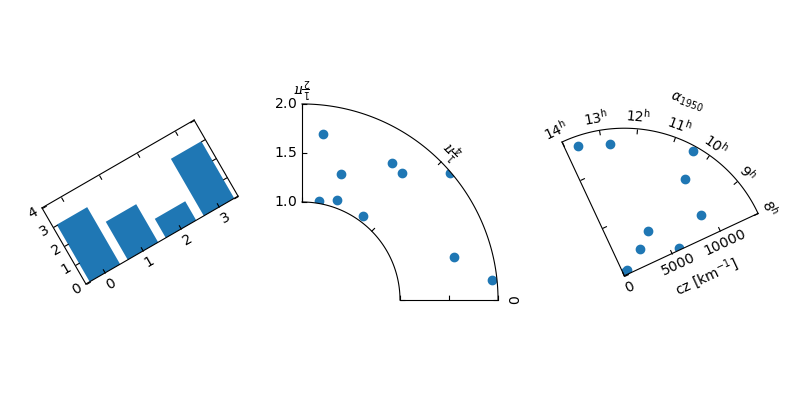

In [19]:
# %load http://matplotlib.org/mpl_toolkits/axes_grid/examples/demo_floating_axes.py
"""
Demo of the floating axes.

This demo shows features of functions in floating_axes:
    * Using scatter function and bar function with changing the
      shape of the plot.
    * Using GridHelperCurveLinear to rotate the plot and set the
      boundary of the plot.
    * Using FloatingSubplot to create a subplot using the return
      value from GridHelperCurveLinear.
    * Making sector plot by adding more features to GridHelperCurveLinear.
"""
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(2, 1).rotate_deg(30)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.5, 3.5, 0, 4))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    aux_ax = ax1.get_aux_axes(tr)

    grid_helper.grid_finder.grid_locator1._nbins = 4
    grid_helper.grid_finder.grid_locator2._nbins = 4

    return ax1, aux_ax


def setup_axes2(fig, rect):
    """
    With custom locator and formatter.
    Note that the extreme values are swapped.
    """
    tr = PolarAxes.PolarTransform()

    pi = np.pi
    angle_ticks = [(0, r"$0$"),
                   (.25*pi, r"$\frac{1}{4}\pi$"),
                   (.5*pi, r"$\frac{1}{2}\pi$")]
    grid_locator1 = FixedLocator([v for v, s in angle_ticks])
    tick_formatter1 = DictFormatter(dict(angle_ticks))

    grid_locator2 = MaxNLocator(2)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(.5*pi, 0, 2, 1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


def setup_axes3(fig, rect):
    """
    Sometimes, things like axis_direction need to be adjusted.
    """

    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-95, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(3)

    ra0, ra1 = 8.*15, 14.*15
    cz0, cz1 = 0, 14000
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"cz [km$^{-1}$]")
    ax1.axis["top"].label.set_text(r"$\alpha_{1950}$")

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


##########################################################
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

ax1, aux_ax1 = setup_axes1(fig, 131)
aux_ax1.bar([0, 1, 2, 3], [3, 2, 1, 3])

ax2, aux_ax2 = setup_axes2(fig, 132)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax2.scatter(theta, radius)

ax3, aux_ax3 = setup_axes3(fig, 133)

theta = (8 + np.random.rand(10)*(14 - 8))*15.  # in degrees
radius = np.random.rand(10)*14000.
aux_ax3.scatter(theta, radius)

plt.show()
